## Vegetation Regrowth Analysis after the Chimney Tops 2 Fire in Great Smoky Mountains

Author: Stepan Bryleev, EarthLab 2022/2023 student \
Supervisor: Bridget Hass, NEON Remote Sensing Data Scientist

In [1]:
# Import packages
import os
import pathlib
import folium
import pandas as pd
import geopandas as gpd

from IPython.display import Image

import reflectance as refl

In [2]:
# Set working directory
working_dir = os.path.join(
    pathlib.Path.home(), 'earth-analytics', '3-final-project')

if not os.path.exists(working_dir):
    os.makedirs(working_dir)

os.chdir(working_dir)

# Define data directories and paths
data_dir = os.path.join(working_dir, 'data')

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

chimney_fire_dir = os.path.join(data_dir, 'chimtops2_burn_bndy')
chimney_fire_path = os.path.join(chimney_fire_dir, 'chimtops2_burn_bndy.shp')

In [3]:
# Get MTBS fire boundary
fire_bound_url = (
    'https://github.com/AreteY/post-wildfire-vegetation-change/'
    'files/8567790/chimtops2_burn_bndy.zip')

fire_bound_data = refl.download_zipfile(
    chimney_fire_path, fire_bound_url, chimney_fire_dir)

# Open fire boundary and reproject crs
chimney_fire_bound = gpd.read_file(chimney_fire_path)
chimney_fire_reproj = chimney_fire_bound.to_crs(epsg=32617)

### 2016 Chimney Tops 2 Fire

On Nov 23 of 2016, a small wildfire was spotted near the Chimney Tops 2 peak in the Great Smoky Mountains National Park in Sevier County, Tennessee. Initially, the fire was contained within a 400-acre zone. But, due to dry and windy conditions, the fire escaped and grew up to more than 10,000 acres on November 28.

After this day, the Fire spread out of the National Park into the city of Gatlinburg, destroying lives and property along with it. Wildfires, such as the [Chimney Tops 2 Fire](https://www.nps.gov/grsm/learn/chimney-tops-2-fire.htm), are becoming more frequent and more intense. Studying such wildfires as well as post-fire ecological changes is very important for maintaining resources, protecting people and ecosystems.


##### Figure 1: The map of the Great Smokey Mountains National Park and Chimney Tops 2 Fire Boundary
*The blue marker denotes the city of Gatlinburg, TN*

In [4]:
# Create dynamic map of the Great Smoky Mountains National Park
# With Chimney Tops 2 Fire Boundary
# Define dataframe with aoi coordinates
fire_aoi_df = pd.DataFrame(columns=["name", "latitude", "longitude"],
                           data=[["Gatlinburg, TN", 35.714167, -83.510278]])

fire_map = folium.Map([35.63, -83.48],
                      zoom_start=10)

style = {'fillColor': '#982E40', 'color': 'darkred'}
folium.GeoJson(data=chimney_fire_bound['geometry'],
               style_function=lambda x: style).add_to(fire_map)

# Add markers for Chimney Tops Fire 2 areas of interest
for name, xy in fire_aoi_df.groupby(["name"]):
    folium.Marker(
        location=[xy.latitude, xy.longitude],
        popup=name,
        color='red',
        icon=folium.Icon()
    ).add_to(fire_map)

fire_map

### What is our first goal?

Our first goal is to perform a detailed remote sensing analysis of the Chimney Tops 2 fire perimeter, evaluate post-fire ecological changes and identify vegetation regrowth dynamics by calculating various spectral difference indices estimating fire severity.

### Data

For completing the analysis, I am using two main data sources:

- NEON Hyperspectral data form [Airborne Observation Platform (AOP)](https://www.neonscience.org/data-collection/airborne-remote-sensing)
- USGS Landsat data [(Operational Land Imager on the Landsat 8 satellite)](https://www.usgs.gov/landsat-missions/landsat-8)

Based on our knowledge that different objects reflect solar energy differently, multiband reflectance data derived from [NEON Imaging Spectrometer (NIS)](https://www.neonscience.org/data-collection/imaging-spectrometer) and Landsat data can provide valuable information on how ecosystems and plant communities are changing due to severe short-term impacts such as wildfires.

The NEON's spectrometer has high spatial resolution (1-meter). However, we should keep in mind, that [NEON’s interannual flight schedule](https://www.neonscience.org/data-collection/flight-schedules-coverage) is primarily constrained by the phenology of vegetation at each NEON site and also by weather and cloud cover. Thus, NEON performs surveys for particular sites only once a year when the dominant plant species are near peak "greenness” and only when atmospheric conditions are cloud-free. It means that it is difficult to collect a long series of data.

Although the Landsat 8 imager has lower spatial resolution (30-meter), Landsat 8 orbits the Earth every 16 days, so there is more data available and it can be used to validate NEON’s data and provide more comprehensive time series.

### Previous Studies

Last year, former Earth Lab Certificate student - Heidi Yoon - did a similar [post-fire analysis for the Chimney Tops 2 wildfire](https://earthlab.colorado.edu/blog/after-burn-vegetation-regrowth). So, my first steps were about reproducing previous Heidi’s Python workflows to dive into the topic more quickly.

Heidi studied 1-km2 tile within the burned area (Figure 2) also comparing data collected from NEON’s Spectrometer and Landsat 8 data.

##### Figure 2: Chimney Tops 2 Fire Boundary and previous study area (by Heidi Yoon)
![Map of the Chimney Tops 2 Fire Boundary with Sample NEON Data](https://earthlab.colorado.edu/sites/default/files/media/image/Screen%20Shot%202022-08-03%20at%2012.11.25%20PM.png)

Here are dNBR images from the last year studies created by Heidi (Figures 3,4). According to both images, most of the area within the 1-km2 tile have signs of mild or significant regrowth. However total dynamics of regrowth inside the whole wildfire perimeter and its spatial differences were not in the scope of these previous studies.

##### Figure 3: dNBR for the Chimney Tops 2 Fire study area using Landsat data (by Heidi Yoon)
![Difference Normalized Burn Ratio of NEON Reflectance](https://earthlab.colorado.edu/sites/default/files/media/image/Screen%20Shot%202022-08-03%20at%2012.14.57%20PM.png)

##### Figure 4: dNBR for the Chimney Tops 2 Fire study area using Landsat data (by Heidi Yoon)
![Difference Normalized Burn Ratio of Landsat Reflectance](https://earthlab.colorado.edu/sites/default/files/media/image/Screen%20Shot%202022-08-03%20at%2012.13.40%20PM.png)

### Perspective studies

As a second step, I used [USGS EarthExplorer website](https://earthexplorer.usgs.gov/) and skills gained from our previous lessons to generate a Color Infrered Image of the post-fire perimeter (Figure 5) to take a new fresh look at the affected area and formulate potential items for further studies such as:

- Expand the study area
- Include more availible NEON AOP data products into analysis (calculate more indices, use more canopy characteristics)
- Estimate spatial differences of wildfire severity
- Estimate vegetation recovery dynamics and its spatial differences

##### Figure 5: CIR Landsat image of the Chimney Tops 2 Fire Boundary

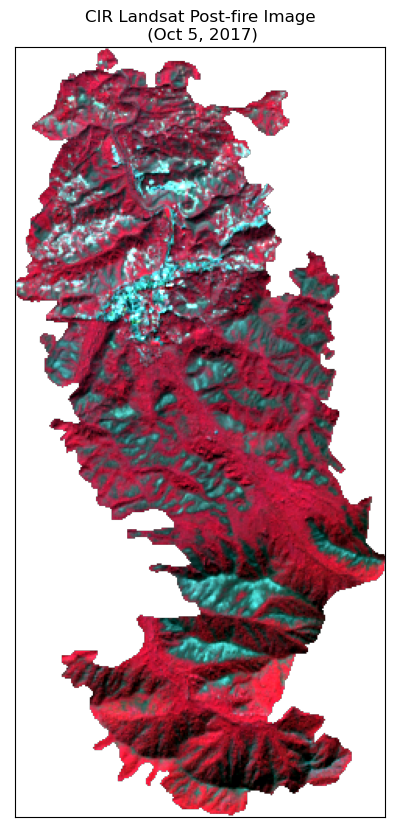

In [5]:
Image('landsat-cir-image.png')

### Preliminary results

In order to expand the study area and evaluate the severity of wildfire [Google Earth Engine](https://earthengine.google.com/) tool can be effectively used.

Together with Bridget I've learned how to create a GEE image of pre/post fire dNBR and evaluate the wildfire severity. So here is a dNBR image based on a standard NEONs flight box for the Great Smokey Mountains site (Figure 6).

Legend in a lower left corner describes classes of severity by colour based on difference Normalized Burn Ratio value.

##### Figure 6: GEE dNBR Image of The Chimney Tops 2 Fire Scar (AOP Data 2016/2017) 

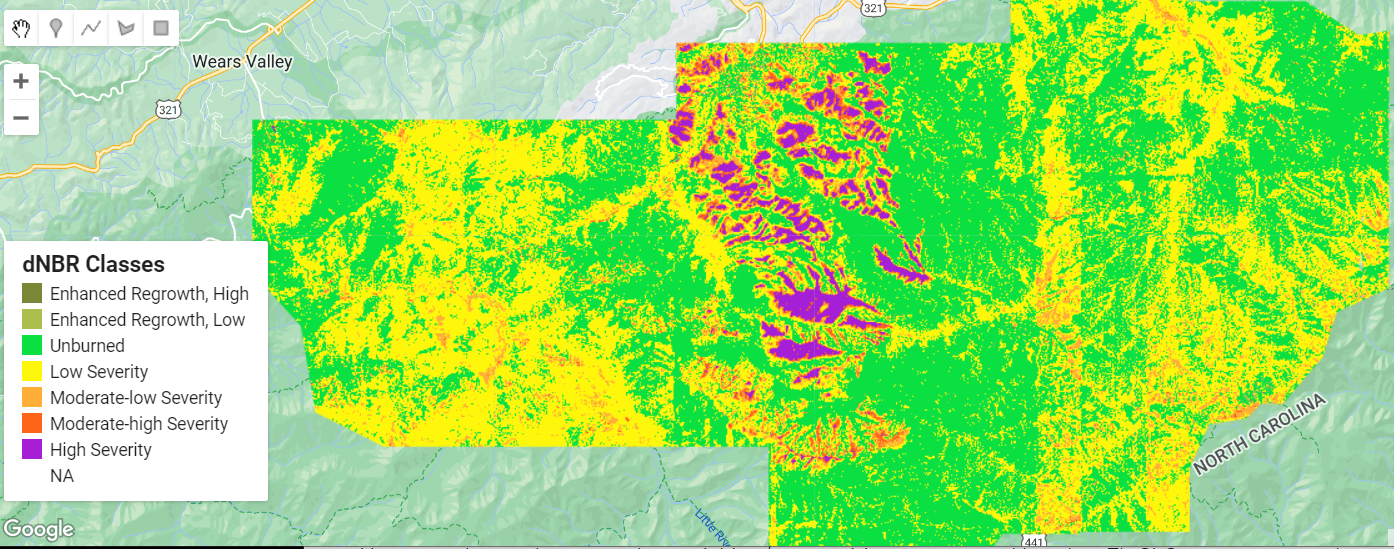

In [6]:
Image('gee-aop-image.png')


Pre and Post fire Canopy Height Models can also be used to determine the canopy height change. So here is a CHM of difference for a Chimney Tops 2 fire scar (Figure 7).
Legend in a lower right corner describes changes in Canopy Height by colour and in meters.

##### Figure 7: GEE dCHM Image of The Chimney Tops 2 Fire Scar (AOP Data 2016/2017)

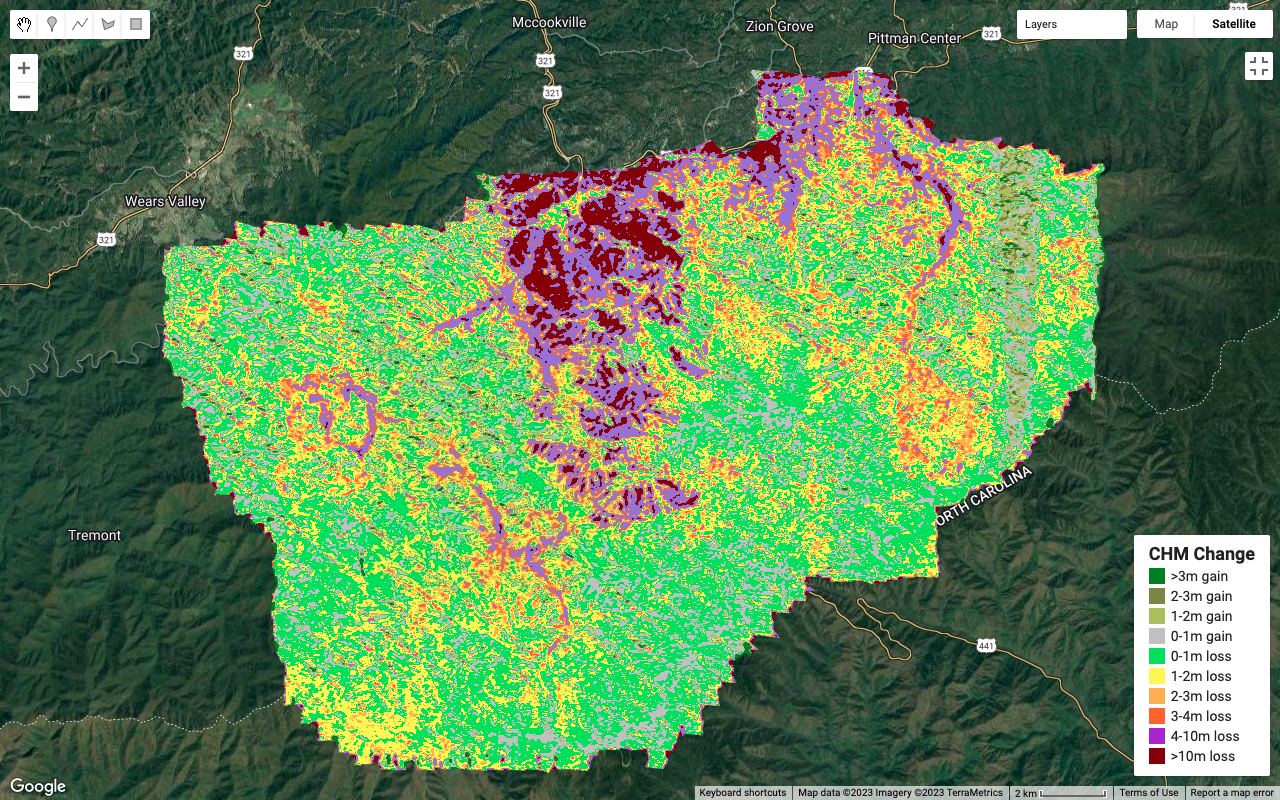

In [7]:
Image('dchm-image.png')

As we can see the Chimney Tops 2 wildfire was a very severe one and led to the significant loss of vegetation and canopy heights across the whole affected area. 

Since GEE requires good skills of using JavaScript, my further steps in the next semester will be about learning JavaScript syntax and data processing technics for calculating more vegetation indicies and generating more GEE images.

### Benefits to society
Besides regular observations and monitoring the environment, NEON develops [online tutorials](https://www.neonscience.org/resources/learning-hub/tutorials) to help researchers processing NEON’s data. Currently, NEON is planning to add a subset of their Airborne Observation Platform data into the Google Earth Engine public data catalog. Therefore, there is a need to create new data processing [tutorials for working with airborne data in GEE](https://www.neonscience.org/resources/learning-hub/tutorials/intro-aop-gee-tutorial), using Python and JavaScript APIs.

So, **our ultimate goal is to create a tutorial based on GEE vegetation regrowth analysis**. Posted on NEONs website, such a tutorial can help young or beginner researchers like us to understand the fundamentals of using GEE for studying wildfires when working with NEON AOP data. It can also be useful for next groups of EarthLab students in the coming years.